In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

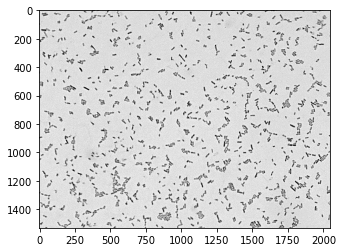

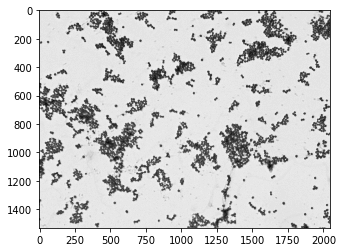

In [2]:
DATADIR = 'C:/Users/joaqu/Downloads/Diploma/Machine Learning & Deep Learning/Cellrecognition'
CATEGORIES = ["Escherichia.coli", "Staphylococcus.aureus"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #paths to E.coli and S.Aureus and so on ... dir
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break


In [3]:
print(img_array.shape)

(1532, 2048)


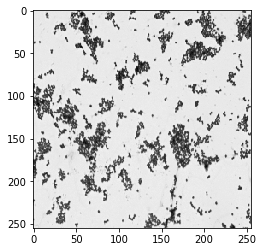

In [4]:
IMG_SIZE = 255
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #paths to E.coli and S.Aureus and so on ... dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        
        
create_training_data()
print(len(training_data))

38


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data:
    print(sample[1])

0
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0


In [30]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [31]:
y


[0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

In [33]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()